# Matematický software
Matěj Ježek | API 2024

In [240]:
import numpy as np
import time
import scipy.special as special
import scipy.integrate as integrate
import math
import scipy.interpolate as interpolate
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve
from scipy.sparse import diags
from scipy.sparse.linalg import cg
import random
import warnings

warnings.filterwarnings("ignore")

# 1. Knihovny a moduly pro matematické výpočty

In [239]:
vektor1 = range(1,10001)
vektor2 = range(10000)

"""Skalární součin
    Python:"""

def vektorovy_soucin(v1, v2):
    start = time.time()
    if len(v1) == len(v2):
        soucin = sum(x * y for x, y in zip(v1, v2))
        stop = time.time()
        print(f"""Python výsledek: {soucin}
Čas: {stop - start} sekund
""")
    else:
        print("Vektory nemají stejnou velikost")

"""Skalární součin
    numpy:"""

def vektorovy_soucin_np(v1, v2):
    start = time.time()
    soucin = np.dot(v1, v2)
    stop = time.time()
    print(f"""Numpy výsledek: {soucin}
Čas: {stop - start} sekund""")

vektorovy_soucin(vektor1, vektor2)
vektorovy_soucin_np(vektor1, vektor2)

Python výsledek: 333333330000
Čas: 0.0010004043579101562 sekund

Numpy výsledek: 333333330000
Čas: 0.0020995140075683594 sekund


In [75]:
"""Faktoriál
    Python:"""

def fakt(cislo):
    start = time.time()
    for i in range(1, cislo):
        cislo = cislo * i
    stop = time.time()
    print(f"""Python výsledek: {cislo}
Čas: {stop - start} sekund
""")
    
"""Faktoriál
    Scipy:"""
    
def fakt_sp(cislo):
    start = time.time()
    cislo = special.factorial(cislo)
    stop = time.time()
    print(f"""Scipy výsledek: {cislo}
Čas: {stop - start} sekund
""")

fakt(500)
fakt_sp(500)

Python výsledek: 12201368259911100687012387854230469262535743428031928421924135883858453731538819976054964475022032818630136164771482035841633787220781772004807852051593292854779075719393306037729608590862704291745478824249127263443056701732707694610628023104526442188787894657547771498634943677810376442740338273653974713864778784954384895955375379904232410612713269843277457155463099772027810145610811883737095310163563244329870295638966289116589747695720879269288712817800702651745077684107196243903943225364226052349458501299185715012487069615681416253590566934238130088562492468915641267756544818865065938479517753608940057452389403357984763639449053130623237490664450488246650759467358620746379251842004593696929810222639719525971909452178233317569345815085523328207628200234026269078983424517120062077146409794561161276291459512372299133401695523638509428855920187274337951730145863575708283557801587354327688886801203998823847021514676054454076635359841744304801289383138968816394874696588175

In [76]:
"""Určitý integrál
    Python:"""

def urcity_integral(f, a, b, dx=0.1):
    start = time.time()
    i = a
    s = 0
    while i <= b:
        s += f(i)*dx
        i += dx
    stop = time.time()
    print(f"""Python výsledek: {s}
Čas: {stop - start} sekund
""")
    
"""Určitý integrál
    Scipy:"""

def urcity_integral_sp(f, a, b):
    start = time.time()
    vysledek = integrate.quad(f, a, b)
    stop = time.time()
    print(f"""Scipy výsledek: {vysledek}
Čas: {stop - start} sekund
""")
    
urcity_integral(lambda x: 3*x**3 - 2*x + 5, 13, 20000)
urcity_integral_sp(lambda x: 3*x**3 - 2*x + 5, 13, 20000)

Python výsledek: 1.2000119960358784e+17
Čas: 0.08352017402648926 sekund

Scipy výsledek: (1.1999999960007869e+17, 1332.2676251101693)
Čas: 0.0 sekund



In [77]:
"""Násobení matic
    Python:"""

A = [[10,24,37,4],
     [56,6,70,81],
     [93,10,100,92]]
B = [[1,2],
     [3,4],
     [5,6],
     [7,8]]

def nasob_matice(A: list, B: list):
    start = time.time()
    #print(f"{len(A[0]), len(B)}")
    if len(A[0]) != len(B):
        return "Matice nemají stejnou velikost"
    else:
        C = []
        for i in A:
            n = 0
            m = 0
            radek = []
            scitanec = []
            #print(f"Na čisto {i, n, m, scitanec, radek, C}")
            while n+1 < len(A[0]) and m < len(B[0]):
                scitanec = []
                for j in i:
                    scitanec.append(j * B[n][m])
                    n += 1
                    #print(f"{i, j, n, m, scitanec, radek, C}")
                radek.append(sum(scitanec))
                m += 1
                n = 0
            C.append(radek)
        stop = time.time()
    print("Python výsledek:")
    for e in C:
        print(e)
    print(f"""Čas: {stop - start} sekund
""")
    


"""Násobení matic
    Numpy:"""
        
maticeA = np.array([[10,24,37,4],
     [56,6,70,81],
     [93,10,100,92]])
maticeB = np.array([[1,2],
     [3,4],
     [5,6],
     [7,8]])

def nasob_matice_np(A, B):
    start = time.time()
    vysledek = np.dot(A, B)
    stop = time.time()
    print(f"""Numpy výsledek:
{vysledek}
Čas: {stop - start} sekund
""")

nasob_matice(A, B)
nasob_matice_np(maticeA, maticeB)

Python výsledek:
[295, 370]
[991, 1204]
[1267, 1562]
Čas: 0.0 sekund

Numpy výsledek:
[[ 295  370]
 [ 991 1204]
 [1267 1562]]
Čas: 0.0 sekund



In [78]:
"""Taylorův polynom
    Python:"""

def taylor_e(x, n):
    start = time.time()
    odhad_e = 0
    for i in range(n):
        odhad_e += x**i/math.factorial(i)
    stop = time.time()
    print(f"""Python výsledek: {odhad_e}
Čas: {stop - start} sekund
""")
    

"""Taylorův polynom
    Scipy:"""

def taylor_e_sp(f, x, stupen, scale):
    start = time.time()
    vysledek = interpolate.approximate_taylor_polynomial(f, x, stupen, scale)
    stop = time.time()
    print(f"""Python výsledek: {vysledek}
Čas: {stop - start} sekund
""")

taylor_e(2,25)
taylor_e_sp(np.exp, 2, 25, 1)

Python výsledek: 7.389056098930649
Čas: 0.0 sekund

Python výsledek:             25             24             23             22
-6.754e-09 x  + 4.629e-09 x  + 4.073e-08 x  - 2.847e-08 x 
              21             20             19             18
 - 1.078e-07 x  + 7.665e-08 x  + 1.646e-07 x  - 1.187e-07 x 
              17             16             15             14
 - 1.606e-07 x  + 1.166e-07 x  + 1.048e-07 x  - 7.576e-08 x 
              13             12             11             10
 - 4.536e-08 x  + 4.841e-08 x  + 1.992e-07 x  + 2.027e-06 x 
              9             8            7           6           5
 + 2.036e-05 x + 0.0001833 x + 0.001466 x + 0.01026 x + 0.06158 x
           4         3         2
 + 0.3079 x + 1.232 x + 3.695 x + 7.389 x + 7.389
Čas: 0.0030012130737304688 sekund



# 2. Vizualizace dat

Text(0, 0.5, 'Počet hlasů')

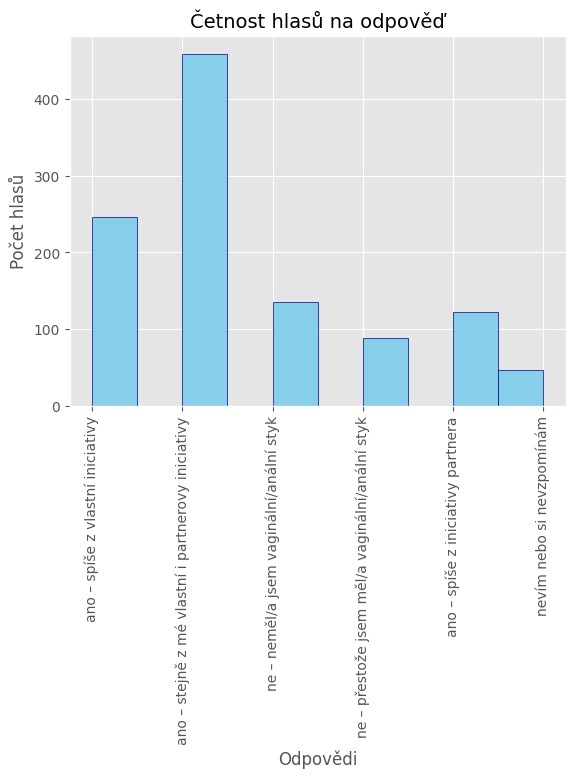

In [241]:
"""Počet jednotlivých odpovědí"""

data = pd.read_csv("archive\oral_sex_czech.csv")

plt.xticks(rotation=90)
plt.hist(data["Praktikujete orální sex?"], 10, color="skyblue", edgecolor='darkblue')
plt.title("Četnost hlasů na odpověď", fontdict={'size': 14})
plt.xlabel("Odpovědi")
plt.ylabel("Počet hlasů")


(15.0, 70.0)

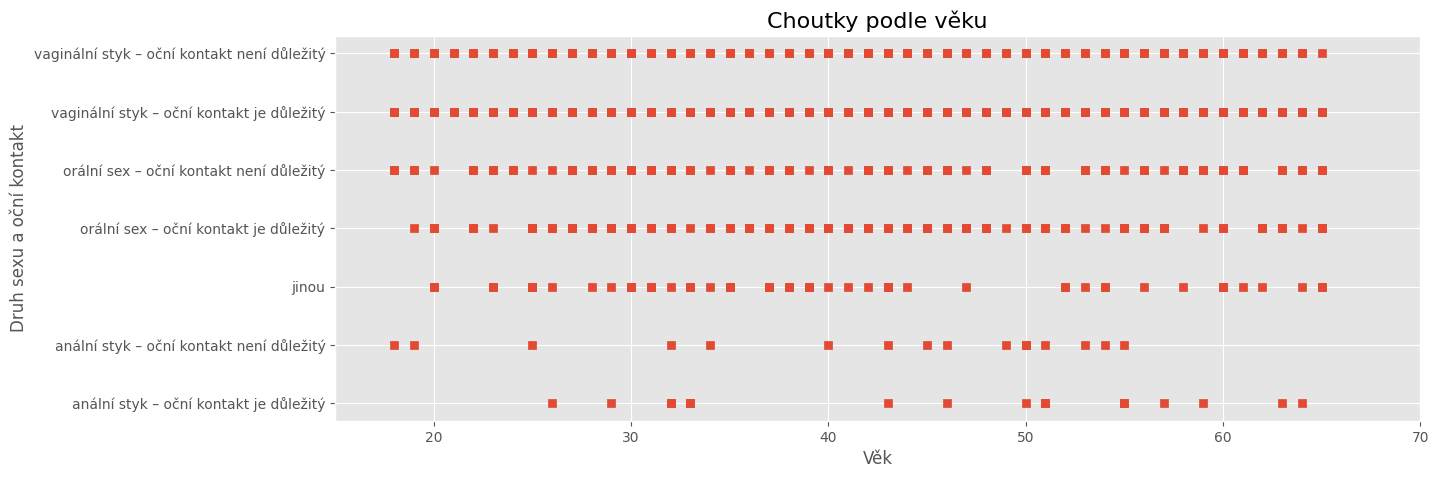

In [127]:
"""Spojitost mezi věkem a odpověďmi"""

x=[]
y=[]

for i in data["Věk"]:
    x.append(i)
for k in data["Druh sexu a oční kontakt"]:
    y.append(k)
y.sort()

plt.style.use("ggplot")
plt.figure(figsize=(14,5))
plt.scatter(x, y, marker="s")
plt.title("Choutky podle věku", fontdict={'size': 16,})
plt.xlabel("Věk")
plt.ylabel("Druh sexu a oční kontakt")
ax = plt.gca()
ax.set_xlim([15, 70])

Text(0.5, 1.0, 'Praktikující orální sex podle pohlaví')

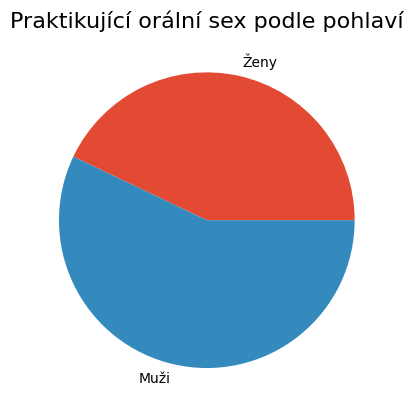

In [243]:
"""Porovnání pohlaví na základě praktikování orálního sexu
"""
z = []

filtr_muzi = np.where((data["Pohlaví"]=="Muž") & (data["Praktikujete orální sex?"].str.startswith("ano")))
filtr_muzi = np.count_nonzero(filtr_muzi)

filtr_zeny = np.where((data["Pohlaví"]=="Žena") & (data["Praktikujete orální sex?"].str.startswith("ano")))
filtr_zeny = np.count_nonzero(filtr_zeny)

z.append(filtr_zeny)
z.append(filtr_muzi)
plt.pie(z, labels=("Ženy", "Muži"))
plt.title("Praktikující orální sex podle pohlaví", fontdict={'size': 16,})

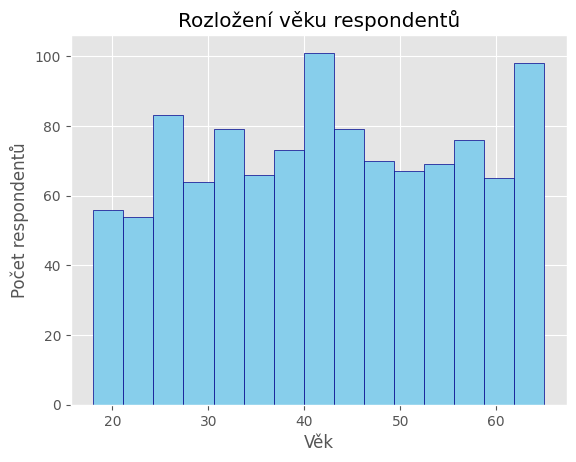

In [125]:
"""Histogram věku respondentů
"""
plt.hist(data['Věk'], bins=15, color="skyblue", edgecolor="darkblue")
plt.xlabel('Věk')
plt.ylabel('Počet respondentů')
plt.title('Rozložení věku respondentů')
plt.show()


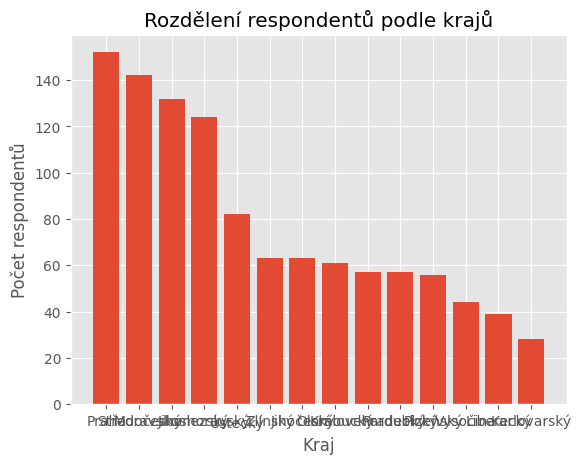

In [242]:
"""Výpočet četnosti pro každý kraj"""
pocet_kraju = data["Kraj"].value_counts()

plt.bar(pocet_kraju.index, pocet_kraju.values)
plt.xlabel('Kraj')
plt.ylabel('Počet respondentů')
plt.title('Rozdělení respondentů podle krajů')
plt.show()


# 3. Úvod do lineární algebry

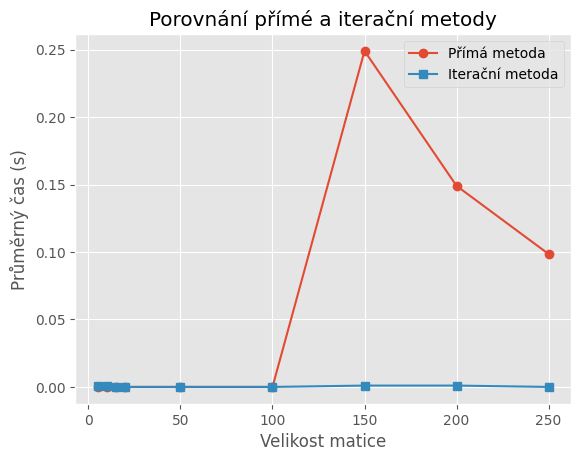

In [244]:
velikosti_matic = [5, 10, 15, 20, 50, 100, 150, 200, 250]
casy1 = []
casy2 = []

def prima_metoda(A, b):
    start = time.time()
    lu, piv = lu_factor(A)
    lu_solve((lu, piv), b)
    stop = time.time()
    return stop-start

def iteracni_metoda(A, b):
    start = time.time()
    cg(A, b)
    stop = time.time()
    return stop-start

for n in velikosti_matic:
    A = diags([4] * n, 0) + diags([-1] * (n - 1), -1) + diags([-1] * (n - 1), 1)
    A = A.toarray()
    b = np.random.rand(n)
    casy1.append(prima_metoda(A, b))
    
    A_ridka = diags([4] * n, 0) + diags([-1] * (n - 1), -1) + diags([-1] * (n - 1), 1)
    casy2.append(iteracni_metoda(A_ridka, b))

plt.plot(velikosti_matic, casy1, label="Přímá metoda (LU)", marker='o')
plt.plot(velikosti_matic, casy2, label="Iterační metoda (CG)", marker='s')
plt.xlabel("Velikost matice")
plt.ylabel("Průměrný čas (s)")
plt.title("Porovnání přímé a iterační metody")
plt.legend(["Přímá metoda", "Iterační metoda"])

# 6. Generování náhodných čísel a testování generátorů

In [176]:
def nahodny_generator(pocet=5):
    zaklad = time.time()
    input("Začněte psát...a pak dejte ENTER")
    for _ in range(pocet):
        zaklad += time.time() % 1
        seed = hash(zaklad)
        print(seed)

nahodny_generator()

1833895236903748384
484070990971519777
1440089754252985121
90265508320756514
1046284271602221858


# 7. Metoda Monte Carlo

In [221]:
"""Jaké jsou šance na výhru v Blackjacku se zjednodušenými pravidly?"""

karty_v_balicku = {
    '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 
    'J': 10, 'Q': 10, 'K': 10, 'A': 11
}

balicek = list(karty_v_balicku.keys()) * 4

def soucet_karet_v_ruce(hrac):
    soucet = sum(karty_v_balicku[karta] for karta in hrac)
    if soucet > 21 and 'A' in hrac:
        soucet -= 10
    return soucet

def blackjack(pocet_her):
    vysledky = {'Výhra': 0, 'Prohra': 0, 'Remíza': 0}
    for _ in range(pocet_her):
        ruka_hrac = [random.choice(balicek), random.choice(balicek)]
        ruka_dealer = [random.choice(balicek), random.choice(balicek)]
        
        while soucet_karet_v_ruce(ruka_hrac) < 17:
            ruka_hrac.append(random.choice(balicek))
        
        soucet_hrace = soucet_karet_v_ruce(ruka_hrac)
        
        if soucet_hrace > 21:
            vysledky['Prohra'] += 1
        else:
            while soucet_karet_v_ruce(ruka_dealer) < 17:
                ruka_dealer.append(random.choice(balicek))
            
            soucet_dealera = soucet_karet_v_ruce(ruka_dealer)
            
            if soucet_dealera > 21 or soucet_hrace > soucet_dealera:
                vysledky['Výhra'] += 1
            elif soucet_hrace == soucet_dealera:
                vysledky['Remíza'] += 1
            else:
                vysledky['Prohra'] += 1
    return vysledky

pocet = 10000
shrnuti = blackjack(pocet)

procenta_vyher = (shrnuti['Výhra'] / pocet) * 100
procenta_proher = (shrnuti['Prohra'] / pocet) * 100
procenta_remíz = (shrnuti['Remíza'] / pocet) * 100

print(f"""Počet her: {pocet}
-----------------------------
    Výhry: {shrnuti['Výhra']} | {procenta_vyher:.2f} %
   Prohry: {shrnuti['Prohra']} | {procenta_proher:.2f} %
   Remízy: {shrnuti['Remíza']} | {procenta_remíz:.2f} %""")


Počet her: 10000
-----------------------------
    Výhry: 4145 | 41.45 %
   Prohry: 4836 | 48.36 %
   Remízy: 1019 | 10.19 %


# 9. Integrace funkce jedné proměnné

In [238]:
def polynom(x):
    return 3*x**2+2*x+1

def goniometricka(x):
    return np.sin(x)

def exponencionalni(x):
    return np.exp(x)

def riemannuv_integral(f, a, b, n):
    dx = (b - a) / n
    hodnoty = np.linspace(a, b, n, endpoint=False)
    return np.sum(f(hodnoty)) * dx

def lichobeznikovy_int(f, a, b, n):
    hodnoty = np.linspace(a, b, n)
    return integrate.trapezoid(f(hodnoty), x=hodnoty)

def simpsonova_metoda(f, a, b, n):
    hodnoty = np.linspace(a, b, n)
    return integrate.simpson(f(hodnoty), x=hodnoty)

a_polynom, b_polynom = 0, 1
a_goniometricka, b_goniometricka = 0, np.pi
a_exponencionalni, b_exponencionalni = 0, 1
pocet_vzorku = 1000

riemannuv_integral_polynom = riemannuv_integral(polynom, a_polynom, b_polynom, n)
lichobeznikovy_int_polynom = lichobeznikovy_int(polynom, a_polynom, b_polynom, n)
simpsonova_metoda_polynom = simpsonova_metoda(polynom, a_polynom, b_polynom, n)

riemannuv_integral_goniometricka = riemannuv_integral(goniometricka, a_goniometricka, b_goniometricka, n)
lichobeznikovy_int_goniometricka = lichobeznikovy_int(goniometricka, a_goniometricka, b_goniometricka, n)
simpsonova_metoda_goniometricka = simpsonova_metoda(goniometricka, a_goniometricka, b_goniometricka, n)

riemannuv_integral_exponencionalni = riemannuv_integral(exponencionalni, a_exponencionalni, b_exponencionalni, n)
lichobeznikovy_int_exponencionalni = lichobeznikovy_int(exponencionalni, a_exponencionalni, b_exponencionalni, n)
simpsonova_metoda_exponencionalni = simpsonova_metoda(exponencionalni, a_exponencionalni, b_exponencionalni, n)

analyticke_polynom = 3
analyticke_goniometricka = 2
analyticke_exponencionalni = np.e - 1

print(f"""
Polynomická funkce:

Riemannův integrál: {riemannuv_integral_polynom}, chyba: {abs(riemannuv_integral_polynom - analyticke_polynom)}
Lichoběžníkový integrál: {lichobeznikovy_int_polynom}, chyba: {abs(lichobeznikovy_int_polynom - analyticke_polynom)}
Simpsonova metoda: {simpsonova_metoda_polynom}, chyba: {abs(simpsonova_metoda_polynom - analyticke_polynom)}


Goniometrická funkce:

Riemannův integrál: {riemannuv_integral_goniometricka}, chyba: {abs(riemannuv_integral_goniometricka - analyticke_goniometricka)}
Lichoběžníkový integrál: {lichobeznikovy_int_goniometricka}, chyba: {abs(lichobeznikovy_int_goniometricka - analyticke_goniometricka)}
Simpsonova metoda: {simpsonova_metoda_goniometricka}, chyba: {abs(simpsonova_metoda_goniometricka - analyticke_goniometricka)}


Exponencionální funkce:

Riemannův integrál: {riemannuv_integral_exponencionalni}, chyba: {abs(riemannuv_integral_exponencionalni - analyticke_exponencionalni)}
Lichoběžníkový integrál: {lichobeznikovy_int_exponencionalni}, chyba: {abs(lichobeznikovy_int_exponencionalni - analyticke_exponencionalni)}
Simpsonova metoda: {simpsonova_metoda_exponencionalni}, chyba: {abs(lichobeznikovy_int_exponencionalni - analyticke_exponencionalni)}
""")


Polynomická funkce:

Riemannův integrál: 2.9975005,chyba: 0.002499499999999877
Lichoběžníkový integrál: 3.000000501001502, chyba: 5.010015020623371e-07
Simpsonova metoda: 3.0, chyba: 0.0


Goniometrická funkce:

Riemannův integrál: 1.9999983550656624, chyba: 1.6449343376301329e-06
Lichoběžníkový integrál: 1.999998351770852, chyba: 1.6482291480546252e-06
Simpsonova metoda: 2.0000000000051616, chyba: 5.161648886087278e-12


Exponencionální funkce:

Riemannův integrál: 1.717422830734966, chyba: 0.000858997724079158
Lichoběžníkový integrál: 1.7182819719360056, chyba: 1.4347696053462755e-07
Simpsonova metoda: 1.7182818284591683, chyba: 1.4347696053462755e-07

